# Подготовка данных

In [43]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [131]:
# df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')
df = pd.read_csv(r"InternationalBifurca_DATA_2025-04-20_0932.csv", sep=',')

In [132]:
df = df.dropna(subset=['sex'])
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [134]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

intervention_cols = ['single_vessel', 'trifurcation', 'bifurcation_location', 
                  'lesion_ivolves', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'cto_bifurc', 
                  'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

new_cols = ['adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan',
            'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation',
            'currently_on_dialysis', 'followup_1_year_do_not_complete_if_2nd_bifurcation_complete',
            'identifier', 'ishemia_test___1', 'ishemia_test___2', 'ishemia_test___3', 'ishemia_test___4',
            'kissing_post_2stent___1', 'kissing_post_2stent___2', 'left_main_stent_direction',
            'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia',
            'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2',
            'other_lesions_in_main_bran', 'other_lesions_in_side_brach',
            'patient_information_do_not_complete_if_2nd_bifurca_complete', 'pot_2', 'pot_balloon_diametr_2',
            'pot_balloon_length', 'pot_balloon_length_2', 'pressure2', 'reson_for_change_stopped___1',
            'reson_for_change_stopped___2', 'reson_for_change_stopped___3', 'restenosis_f5', 'sb_length_2',
            'sb_stenosis_f2', 'side_branch_calcification_2', 'side_branch_restenosis',
            'side_branch_restenosis_3', 'side_branch_restenosis_5', 'stent_pressure', 'stent_type_2___1',
            'stent_type_2___2', 'stent_type_2___3', 'stent_type_2___4', 'stent_type_2___5', 'stent_type_2___6',
            'stent_type_2___7', 'stent_type_2___8', 'stent_type_2___9', 'thrombolysis', 'uncross_strategy___1',
            'uncross_strategy___2', 'uncross_strategy___3', 'uncross_strategy___4', 'uncross_strategy___5',
            'uncross_strategy___6', 'uncross_strategy___7', 'uncross_strategy___8', 'uncross_strategy___9']

In [135]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [136]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [137]:
df

,record_id,identifier,date,adhoc_pci,sex,age,weight,height,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,angio_follow_f5,restenosis_f5,side_branch_restenosis_5
0,MNRI0001,MNRI-2018-0001,2018-02-01,1.0,2.0,77.0,84.0,165.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,MNRI-2018-0002,2018-01-24,0.0,1.0,68.0,81.0,171.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,MNRI-2018-0003,2018-01-24,0.0,1.0,62.0,74.0,180.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,MNRI-2018-0004,2018-01-30,1.0,1.0,67.0,84.0,167.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,MNRI-2018-0005,2018-01-30,0.0,1.0,57.0,103.0,174.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,TRCH-2019-0026,2019-03-11,1.0,1.0,67.0,90.0,174.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,TRCH0027,TRCH-2019-0027,2019-03-18,1.0,1.0,69.0,60.0,174.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,TRCH0028,TRCH-2019-0028,2019-03-19,0.0,2.0,81.0,50.0,160.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,TRCH0029,TRCH-2019-0029,2019-03-28,1.0,1.0,86.0,74.0,170.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
patient_present_cols = patient_info_cols + intervention_cols + operation_cols + new_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [139]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,clinical_presentation,time_from_mi_symptoms_onse,ccs_class,...,thrombolysis,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,5.0,4.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,NaN,1.0,...,NaN,0,0,0,0,0,0,0,0,0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,4.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,2.0,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,0
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,NaN,2.0,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,3.0,1.0,NaN,...,1.0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,2.0,NaN,NaN,...,0.0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,3.0,1.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0


In [140]:
# columns_to_preserve = ['valvular_disease', 'previous_stroke_tia', 'twostent_technique']
columns_to_preserve = []
def remove_columns_with_nan_threshold(df, threshold=250):
    nan_counts = df.isnull().sum()
    
    columns_to_drop = [col for col in nan_counts[nan_counts > threshold].index 
                      if col not in columns_to_preserve]
    
    print(columns_to_drop)
    
    df_dropped = df.drop(columns=columns_to_drop)
    
    return df_dropped

In [141]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

['time_from_mi_symptoms_onse', 'ccs_class', 'insulin_diabetes', 'valvular_disease', 'valvular_disease_was_previ', 'previously_treated_cerebro', 'previous_stroke_tia', 'previously_treated_periphe', 'lesion_ivolves', 'total_trobotic_occlusion', 'sb_length', 'timi_flow_main_branch', 'timi_flow_side_branch', 'stent_was_implated_from_lm', 'first_stent_impanted', 'provisional_2_stent_techni', 'dstent2', 'stent_length2', 'sb_stent_side_branch_diametr', 'twostent_technique', 'proximal_optimization', 'pot', 'pot_balloon_diametr', 'several_kissing', 'adverse_event_followup_f2_v2', 'angio_follow_f5', 'antiplatalet_drug_was_chan', 'attempt_to_dilate_stenting', 'ballooon_size_for_postdila', 'complete_revascularisation', 'left_main_stent_direction', 'main_branch_calcification', 'mb_stenosis_f2', 'medina_side_branch_2', 'myocardial_ischemia', 'myocardial_ishemia_was_det', 'number_of_kissing', 'number_of_kissing_2', 'other_lesions_in_main_bran', 'other_lesions_in_side_brach', 'pot_2', 'pot_balloon_dia

In [142]:
# patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df = patient_present_df.drop(['date'], axis = 1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___9,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___5,uncross_strategy___6,uncross_strategy___7,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [144]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,record_id,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,MNRI0001,2.0,77.0,1.0,84.0,165.0,5.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,MNRI0002,1.0,68.0,0.0,81.0,171.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,MNRI0003,1.0,62.0,0.0,74.0,180.0,4.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,MNRI0004,1.0,67.0,1.0,84.0,167.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,MNRI0005,1.0,57.0,0.0,103.0,174.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,TRCH0026,1.0,67.0,1.0,90.0,174.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2140,TRCH0027,1.0,69.0,1.0,60.0,174.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2141,TRCH0028,2.0,81.0,0.0,50.0,160.0,2.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2142,TRCH0029,1.0,86.0,1.0,74.0,170.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 
            'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
            'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 
            'stent_diameter', 'stent_length', 'stent_distal_vessel_size', 'sb_stent_sb_diametr',
            'ballooon_size_for_postdila', 
            'left_main_stent_direction',
            'mb_stenosis_f2',
            'myocardial_ischemia',
            'number_of_kissing_2',
            'pot_balloon_diametr_2',
            'pot_balloon_length',
            'pot_balloon_length_2',
            'pressure2',
            'sb_length_2',
            'sb_stenosis_f2',
            'stent_pressure']

categorical = ['sex', 'clinical_presentation', 'bifurcation_location', 'stent_number', 
              'stent_number_bif', 'stent_technique', 'stent_direction']

binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 
         'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1', 'if_yes_what_type___2',
         'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___6', 
         'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 
         'history_of_cancer', 'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation',
         'calcium', 'trombosis', 'restenosis_reocclusion', 'cto_bifurc', 
         'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm',
         'def', 'def_2', 'side_protection', 'main_predilatation', 'side_predilat',
         'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 
         'sb_dilatation', 'stent_postdilatation', 'kissing_post', 'modified_kis',
         'currently_on_dialysis',
         'ishemia_test___1',
         'ishemia_test___2',
         'ishemia_test___3',
         'kissing_post_2stent___1',
         'kissing_post_2stent___2',
         'reson_for_change_stopped___1',
         'reson_for_change_stopped___2',
         'reson_for_change_stopped___3',
         'stent_type_2___1',
         'stent_type_2___3',
         'stent_type_2___4',
         'stent_type_2___5',
         'stent_type_2___6',
         'stent_type_2___7',
         'stent_type_2___8',
         'uncross_strategy___1',
         'uncross_strategy___2',
         'uncross_strategy___3',
         'uncross_strategy___4',
         'uncross_strategy___8',
         'uncross_strategy___9']

In [146]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

158
2044


In [147]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [148]:
unique, counts = np.unique(combined_adverse_events, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)

{0: 1886, 1: 53, 2: 18, 3: 51, 4: 36}


In [149]:
id_col = patient_present_df['record_id']
patient_present_df = patient_present_df.drop(['record_id', 'identifier'], axis=1)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [151]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [152]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical + binary] = imputer_categorical.fit_transform(X_train[categorical + binary])
X_test[categorical + binary] = imputer_categorical.transform(X_test[categorical + binary])
X_val[categorical + binary] = imputer_categorical.transform(X_val[categorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,clinical_presentation,diabet,hypertension,smoking,dyslipidemia,...,stent_type_2___5,stent_type_2___6,stent_type_2___7,stent_type_2___8,uncross_strategy___1,uncross_strategy___2,uncross_strategy___3,uncross_strategy___4,uncross_strategy___8,uncross_strategy___9
0,1.0,41.0,0.0,100.000000,177.000000,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,56.0,1.0,81.000000,172.000000,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,55.0,1.0,87.541718,172.066825,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,79.0,0.0,61.000000,160.000000,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,61.0,1.0,84.000000,179.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2.0,69.0,0.0,111.000000,159.000000,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,1.0,57.0,0.0,96.000000,178.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1223,1.0,63.0,0.0,80.000000,162.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1224,1.0,75.0,0.0,165.000000,71.000000,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df_for_ohe = pd.concat([X_train[categorical], X_test[categorical], X_val[categorical]], ignore_index=True)
ohe.fit(df_for_ohe)

OneHotEncoder(sparse_output=False)

In [154]:
def process_ohe(dataframe, cat_cols, encoder):
    encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

    encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

    dataframe = pd.concat([dataframe, encoded_columns], axis=1)

    dataframe.drop(cat_cols, axis=1, inplace=True)

    return dataframe

In [155]:
# X_train = process_ohe(X_train, categorical, ohe)
# X_test = process_ohe(X_test, categorical, ohe)
# X_val = process_ohe(X_val, categorical, ohe)
# X_train

In [156]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

In [157]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,age,anemia,ef,cerebrovascular_disease,ckd,peripheral_artery_disease,if_yes_what_type___1,creatinine,single_vessel,calcium,...,previous_pci,cto_bifurc,side_diametr,major_lm,mi_history,trifurcation,dyslipidemia,smoking,distal_diametr,restenosis_reocclusion
0,41.0,0.0,49.0,0.0,91.130343,0.0,0.0,90.0,0.0,0.0,...,1.0,0.0,2.4,0.0,1.0,0.0,0.0,0.0,3.3,0.0
1,56.0,0.0,68.0,0.0,83.132035,0.0,0.0,89.0,1.0,0.0,...,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0
2,55.0,0.0,70.0,0.0,78.364633,0.0,0.0,94.0,1.0,0.0,...,0.0,0.0,2.4,0.0,0.0,0.0,1.0,0.0,2.6,0.0
3,79.0,0.0,73.0,1.0,64.542788,0.0,0.0,96.0,0.0,1.0,...,0.0,0.0,3.1,0.0,0.0,0.0,0.0,0.0,2.8,0.0
4,61.0,0.0,62.0,0.0,87.329657,0.0,0.0,83.0,0.0,0.0,...,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,3.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,69.608441,0.0,0.0,97.0,1.0,0.0,...,1.0,0.0,2.7,0.0,0.0,0.0,0.0,0.0,2.8,0.0
1222,57.0,0.0,39.0,0.0,53.707072,0.0,0.0,127.0,0.0,0.0,...,0.0,0.0,2.4,0.0,0.0,1.0,0.0,0.0,2.8,0.0
1223,63.0,1.0,71.0,0.0,86.111321,0.0,0.0,83.0,1.0,0.0,...,1.0,0.0,2.2,0.0,0.0,0.0,0.0,0.0,2.3,0.0
1224,75.0,0.0,69.0,1.0,68.979615,1.0,0.0,93.0,1.0,0.0,...,1.0,0.0,2.4,0.0,0.0,0.0,1.0,1.0,2.7,1.0


In [158]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease', 'ckd',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'creatinine',
       'single_vessel', 'calcium', 'stent_type___3', 'medina_side',
       'atrial_fibrilation', 'height', 'def', 'history_of_cancer',
       'side_stenosis', 'minor_criteria', 'clinical_presentation', 'adhoc_pci',
       'previous_pci', 'cto_bifurc', 'side_diametr', 'major_lm', 'mi_history',
       'trifurcation', 'dyslipidemia', 'smoking', 'distal_diametr',
       'restenosis_reocclusion'],
      dtype='object')

In [159]:
columns_to_preserve

[]

In [160]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['ckd',
 'creatinine',
 'side_stenosis',
 'minor_criteria',
 'adhoc_pci',
 'major_lm',
 'mi_history',
 'distal_diametr']

In [161]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,restenosis_reocclusion
0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5.0,1.0,0.0,2.4,0.0,0.0,0.0,0.0
1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0
2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.4,0.0,1.0,0.0,0.0
3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.1,0.0,0.0,0.0,0.0
4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.7,0.0,0.0,0.0,0.0
1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.4,1.0,0.0,0.0,0.0
1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.2,0.0,0.0,0.0,0.0
1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.4,0.0,1.0,1.0,1.0


In [162]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'clinical_presentation',
       'previous_pci', 'cto_bifurc', 'side_diametr', 'trifurcation',
       'dyslipidemia', 'smoking', 'restenosis_reocclusion'],
      dtype='object')

In [163]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)

(1226, 22)
(409, 22)
(409, 22)
(1226,)


In [164]:
print(X_train.columns)

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'clinical_presentation',
       'previous_pci', 'cto_bifurc', 'side_diametr', 'trifurcation',
       'dyslipidemia', 'smoking', 'restenosis_reocclusion'],
      dtype='object')


# edge case

In [102]:
import importlib
import edge_case
importlib.reload(edge_case)
from edge_case import generate_edge_cases

edge_cases = generate_edge_cases(num_samples=100)
edge_cases


,age,height,clinical_presentation,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,medina_side,...,history_of_cancer,previous_pci,side_diametr,stent_type___3,restenosis_reocclusion,mortality,smoking,dyslipidemia,anemia,atrial_fibrilation
0,98.547127,148.786080,5,22.758175,1,1,1,1,1,1,...,0,1,1.286993,1,1,1,1,1,1,1
1,95.190380,143.312584,5,22.957148,1,1,1,0,1,1,...,0,1,1.182184,1,1,1,1,1,1,1
2,92.197053,141.554119,5,16.857208,1,1,0,1,1,1,...,1,1,1.018020,1,1,1,1,1,1,1
3,86.612399,144.414461,5,25.325726,1,0,1,1,1,1,...,1,0,1.652306,1,1,1,0,1,1,1
4,95.537989,150.319807,5,18.028152,1,1,0,1,1,1,...,0,0,1.442303,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,86.068547,151.702500,5,22.308479,1,1,1,1,1,1,...,0,1,1.162945,1,1,1,1,1,1,1
96,89.651720,166.249552,5,21.132018,1,1,1,1,1,1,...,1,1,1.839484,1,1,1,1,1,1,1
97,91.602568,147.235602,5,26.947892,1,1,1,1,1,1,...,1,0,1.382220,1,1,1,1,1,1,1
98,95.935090,159.744401,5,26.170940,1,1,1,1,1,1,...,1,1,1.979665,1,1,1,1,1,1,1


In [103]:
edge_cases.columns

Index(['age', 'height', 'clinical_presentation', 'ef',
       'cerebrovascular_disease', 'peripheral_artery_disease',
       'if_yes_what_type___1', 'single_vessel', 'calcium', 'medina_side',
       'trifurcation', 'cto_bifurc', 'def', 'history_of_cancer',
       'previous_pci', 'side_diametr', 'stent_type___3',
       'restenosis_reocclusion', 'mortality', 'smoking', 'dyslipidemia',
       'anemia', 'atrial_fibrilation'],
      dtype='object')

In [104]:
edge_case_cols = set(edge_cases.columns)
x_train_cols = set(X_train.columns)

common_cols = edge_case_cols.intersection(x_train_cols)
only_in_edge_cases = edge_case_cols - x_train_cols
only_in_x_train = x_train_cols - edge_case_cols

print(f"COMPARISON OF COLUMNS:")
print(f"\nTotal columns in edge_cases: {len(edge_case_cols)}")
print(f"Total columns in X_train: {len(x_train_cols)}")
print(f"Number of common columns: {len(common_cols)}")

print("\n--- COMMON COLUMNS ---")
for col in sorted(common_cols):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN EDGE CASES ---")
for col in sorted(only_in_edge_cases):
    print(f"- {col}")

print("\n--- COLUMNS ONLY IN X_TRAIN ---")
for col in sorted(only_in_x_train):
    print(f"- {col}")

COMPARISON OF COLUMNS:

Total columns in edge_cases: 23
Total columns in X_train: 22
Number of common columns: 22

--- COMMON COLUMNS ---
- age
- anemia
- atrial_fibrilation
- calcium
- cerebrovascular_disease
- clinical_presentation
- cto_bifurc
- def
- dyslipidemia
- ef
- height
- history_of_cancer
- if_yes_what_type___1
- medina_side
- peripheral_artery_disease
- previous_pci
- restenosis_reocclusion
- side_diametr
- single_vessel
- smoking
- stent_type___3
- trifurcation

--- COLUMNS ONLY IN EDGE CASES ---
- mortality

--- COLUMNS ONLY IN X_TRAIN ---


In [105]:
edge_cases_target = edge_cases['mortality']
edge_cases_features = edge_cases.copy().drop('mortality', axis=1)

# Syntetic data

In [86]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,def,history_of_cancer,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,restenosis_reocclusion
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,5.0,1.0,0.0,2.4,0.0,0.0,0.0,0.0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.4,0.0,1.0,0.0,0.0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.1,0.0,0.0,0.0,0.0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,2.7,0.0,0.0,0.0,0.0
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,2.4,1.0,0.0,0.0,0.0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,2.2,0.0,0.0,0.0,0.0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,2.4,0.0,1.0,1.0,1.0


In [87]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,...,history_of_cancer,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,restenosis_reocclusion,target
0,0,41.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,1.0,0.0,2.4,0.0,0.0,0.0,0.0,0
1,1,56.0,0.0,68.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0
2,2,55.0,0.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,0.0,0.0,2.4,0.0,1.0,0.0,0.0,0
3,3,79.0,0.0,73.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,3.1,0.0,0.0,0.0,0.0,0
4,4,61.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1221,69.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.7,0.0,0.0,0.0,0.0,1
1222,1222,57.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,2.4,1.0,0.0,0.0,0.0,0
1223,1223,63.0,1.0,71.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,2.2,0.0,0.0,0.0,0.0,0
1224,1224,75.0,0.0,69.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,2.4,0.0,1.0,1.0,1.0,0


In [88]:
from synthcity.plugins import Plugins

# Print the list of available plugins
print(Plugins().list())

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


[2025-05-13T21:19:21.657481+0400][14921][CRITICAL] load failed: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
[2025-05-13T21:19:21.658081+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:19:21.658302+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T21:19:21.911171+0400][14921][CRITICAL] module disabled: /Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/synthcity/plugins/generic/plugin_goggle.py


['pategan', 'aim', 'image_cgan', 'nflow', 'adsgan', 'tvae', 'arf', 'ctgan', 'privbayes', 'timevae', 'radialgan', 'fflows', 'marginal_distributions', 'survival_gan', 'uniform_sampler', 'dpgan', 'bayesian_network', 'survival_ctgan', 'dummy_sampler', 'image_adsgan', 'survival_nflow', 'rtvae', 'decaf', 'timegan', 'ddpm', 'survae']


# Оптимизация CatBoost на auc-roc для 10 фолдов

In [89]:
# X_train_new = pd.concat([X_train, syntetic_minority_dropped])
# X_train_new

In [90]:
# y_train_new = np.concatenate((y_train, syntetic_target))
# y_train_new

In [166]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [167]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [168]:
X_train_folds = pd.concat([X_train, X_val, edge_cases_features])
y_train_k_fold = np.concatenate((y_train, y_val, edge_cases_target), axis=0)

In [110]:
scaled_features = scaller.transform(X_train_folds)

In [111]:
train_df = pd.DataFrame(data=scaled_features, columns=X_train_folds.columns)
train_df

,age,anemia,ef,cerebrovascular_disease,peripheral_artery_disease,if_yes_what_type___1,single_vessel,calcium,stent_type___3,medina_side,...,def,history_of_cancer,clinical_presentation,previous_pci,cto_bifurc,side_diametr,trifurcation,dyslipidemia,smoking,restenosis_reocclusion
0,-2.317888,-0.228824,-0.659566,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,1.297194,-0.708838,...,-0.075779,-0.232745,2.292618,1.163257,-0.286501,-0.417415,-0.212564,-0.825685,-0.516264,-0.302851
1,-0.791826,-0.228824,1.121668,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,1.410760,...,-0.075779,4.296547,1.534186,1.163257,-0.286501,0.684941,-0.212564,-0.825685,-0.516264,3.301956
2,-0.893563,-0.228824,1.309166,-0.379021,-0.288165,-0.155651,1.079851,-0.517531,-0.770894,-0.708838,...,-0.075779,-0.232745,0.775754,-0.859655,-0.286501,-0.417415,-0.212564,1.211116,-0.516264,-0.302851
3,1.548135,-0.228824,1.590414,2.638378,-0.288165,-0.155651,-0.926054,1.932250,-0.770894,-0.708838,...,-0.075779,-0.232745,-0.741111,-0.859655,-0.286501,0.868667,-0.212564,-0.825685,-0.516264,-0.302851
4,-0.283139,-0.228824,0.559173,-0.379021,-0.288165,-0.155651,-0.926054,-0.517531,-0.770894,-0.708838,...,-0.075779,4.296547,0.017321,-0.859655,-0.286501,-0.233689,-0.212564,-0.825685,-0.516264,-0.302851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2.267271,4.370167,-3.161873,2.638378,3.470238,6.424629,1.079851,1.932250,1.297194,1.410760,...,13.196320,-0.232745,2.292618,1.163257,3.490386,-2.690206,4.704474,1.211116,1.936992,3.301956
1731,2.631814,4.370167,-3.272165,2.638378,3.470238,6.424629,1.079851,1.932250,1.297194,1.410760,...,13.196320,4.296547,2.292618,1.163257,3.490386,-1.447228,-0.212564,1.211116,1.936992,3.301956
1732,2.830288,4.370167,-2.726932,2.638378,3.470238,6.424629,1.079851,1.932250,1.297194,1.410760,...,13.196320,4.296547,2.292618,-0.859655,3.490386,-2.287339,-0.212564,1.211116,1.936992,3.301956
1733,3.271068,4.370167,-2.799770,2.638378,3.470238,6.424629,1.079851,1.932250,1.297194,1.410760,...,13.196320,4.296547,2.292618,1.163257,3.490386,-1.189678,-0.212564,1.211116,1.936992,3.301956


In [125]:
X_train.columns

Index(['age', 'anemia', 'ef', 'cerebrovascular_disease',
       'peripheral_artery_disease', 'if_yes_what_type___1', 'single_vessel',
       'calcium', 'stent_type___3', 'medina_side', 'atrial_fibrilation',
       'height', 'def', 'history_of_cancer', 'clinical_presentation',
       'previous_pci', 'cto_bifurc', 'side_diametr', 'trifurcation',
       'dyslipidemia', 'smoking', 'restenosis_reocclusion'],
      dtype='object')

In [119]:
if all(isinstance(cat, int) for cat in categorical):
    # Converting indices to column names
    categorical_names = [X_train_folds.columns[i] for i in categorical if i < len(X_train_folds.columns)]
else:
    # Already column names
    categorical_names = categorical

# Find intersection with actual columns in X_train_folds
valid_categorical_features = [cat for cat in categorical_names if cat in X_train_folds.columns]

# Print information for debugging
print(f"Total categorical features specified: {len(categorical_names)}")
print(f"Categorical features present in training data: {len(valid_categorical_features)}")
print(f"Missing categorical features: {set(categorical_names) - set(valid_categorical_features)}")

Total categorical features specified: 7
Categorical features present in training data: 1
Missing categorical features: {'stent_number_bif', 'stent_number', 'sex', 'stent_technique', 'stent_direction', 'bifurcation_location'}


In [123]:
valid_categorical_features

['clinical_presentation']

In [126]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
from catboost import CatBoostClassifier
import json
import os

# Suppress warnings
warnings.filterwarnings("ignore")

def objective(params):
    # Convert parameters to proper format
    params['learning_rate'] = float(params['learning_rate'])
    params['iterations'] = int(params['iterations'])
    params['depth'] = int(params['depth'])
    params['border_count'] = int(params['border_count'])
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        # Get train and test data for this fold - no scaling
        X_train = X_train_folds.iloc[train_index]
        X_test = X_train_folds.iloc[test_index]
        y_train = y_train_k_fold[train_index]
        y_test = y_train_k_fold[test_index]
        
        # Initialize classifier with current parameters
        classifier = CatBoostClassifier(
            iterations=params['iterations'],
            depth=params['depth'],
            learning_rate=params['learning_rate'],
            l2_leaf_reg=params['l2_leaf_reg'],
            border_count=params['border_count'],
            cat_features=valid_categorical_features,
            verbose=0
        )
        
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # Make predictions
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space (small range for essential params)
space = {
    'iterations': hp.quniform('iterations', 100, 500, 100),  # 100, 200, 300, 400, 500
    'depth': hp.choice('depth', [4, 6, 8]),                 # Small range of depths
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.1)),  # Log-uniform between 0.01 and 0.1
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 5),         # Regularization parameter
    'border_count': hp.quniform('border_count', 32, 128, 32)  # 32, 64, 96, 128
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals = 50,
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    cat_features=valid_categorical_features,  # Added cat_features for final model
    verbose=0
)

# Use the full dataset for final training - no scaling
X_train_final = X_train_folds
y_train_final = y_train_k_fold

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
best_model.save_model('model_CatBoost_edge_cases_CV_cat_features_param.cbm')

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'iterations': int(best_params['iterations']),
        'depth': int(best_params['depth']),
        'learning_rate': float(best_params['learning_rate']),
        'l2_leaf_reg': float(best_params['l2_leaf_reg']),
        'border_count': int(best_params['border_count'])
    },
    'evaluation_metrics': best_metrics
}

with open('scores_CatBoost_edge_cases_CV_cat_features_param.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

05/13/2025 22:41:43:ERROR:job exception: Invalid type for cat_feature[non-default value idx=0,feature_idx=14]=5.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=14]=5.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [165]:
best_params

{'border_count': 96,
 'depth': 8,
 'iterations': 300,
 'l2_leaf_reg': 2.97044324407968,
 'learning_rate': 0.014915968357559052}

In [169]:
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    verbose=0
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("arf")
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=3000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 200:
    minority_synthetic_data = minority_synthetic_data.sample(n=200)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
# best_model.save_model('scores_CatBoost_synthetic_arf.cbm')

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'iterations': int(best_params['iterations']),
        'depth': int(best_params['depth']),
        'learning_rate': float(best_params['learning_rate']),
        'l2_leaf_reg': float(best_params['l2_leaf_reg']),
        'border_count': int(best_params['border_count'])
    },
    'evaluation_metrics': best_metrics
}

# with open('scores_CatBoost_synthetic_arf.json', 'w') as f:
    # json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-13T23:12:01.720604+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:01.720604+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:01.720604+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:01.721948+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:01.721948+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:01.721948+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:01.722721+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T23:12:01.722721+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6746397694524495
Iteration number 1 reached accuracy of 0.4219020172910663.


[2025-05-13T23:12:08.896410+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 2988. prev length 3000. Original dtype float64.
[2025-05-13T23:12:08.896410+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 2988. prev length 3000. Original dtype float64.
[2025-05-13T23:12:08.897267+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 2975. prev length 2988. Original dtype float64.
[2025-05-13T23:12:08.897267+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 2975. prev length 2988. Original dtype float64.
[2025-05-13T23:12:08.898895+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 2962. prev length 2975. Original dtype float64.
[2025-05-13T23:12:08.898895+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 2962. prev length 2975. Original dtype float64.
[2025-05-13T23:12:08.899712+0400][14921][INFO] [height] quality lo

Best parameters, model, and evaluation metrics saved.


In [ ]:
# Import necessary libraries if not already imported
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix
import seaborn as sns

# Define the best parameters from the JSON file
# best_params = {
#     "iterations": 100,
#     "depth": 8, 
#     "learning_rate": 0.021945165391427622,
#     "l2_leaf_reg": 3.493140418243481,
#     "border_count": 96
# }

# Initialize the CatBoost model with the best parameters
final_model = CatBoostClassifier(
    iterations=best_params['iterations'],
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate'],
    l2_leaf_reg=best_params['l2_leaf_reg'],
    border_count=int(best_params['border_count']),
    cat_features=categorical_features,
    verbose=0
)

# Train the model on the full training dataset
print("Training final model with best hyperparameters...")
final_model.fit(X_train, y_train)

# Evaluate on test dataset
print("\n--- Evaluating on Test Dataset ---")

# Apply the same preprocessing as was done for training data (if scaler was used)
# Assuming X_test is already loaded and properly formatted
# If not, you may need to load and preprocess your test data first

# Make predictions on test data
test_predictions_proba = final_model.predict_proba(X_test)[:, 1]
test_predictions = final_model.predict(X_test)

# Calculate metrics
test_metrics = {
    'roc_auc': roc_auc_score(y_test, test_predictions_proba),
    'f1': f1_score(y_test, test_predictions, zero_division=0),
    'precision': precision_score(y_test, test_predictions, zero_division=0),
    'recall': recall_score(y_test, test_predictions, zero_division=0),
    'accuracy': accuracy_score(y_test, test_predictions)
}

# Print test metrics
print("\nTest Set Performance:")
print(f"ROC AUC: {test_metrics['roc_auc']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")

# Save the model and evaluation metrics
model_output_path = 'catboost_test_model_edge_cases.cbm'
final_model.save_model(model_output_path)
print(f"Model saved to {model_output_path}")

# Save the test metrics to a JSON file
output_metrics = {
    'best_parameters': best_params,
    'test_metrics': test_metrics
}

metrics_output_path = 'catboost_test_evaluation_edge_cases.json'
with open(metrics_output_path, 'w') as f:
    json.dump(output_metrics, f, indent=2)
print(f"Metrics saved to {metrics_output_path}")

Training final model with best hyperparameters...

--- Evaluating on Test Dataset ---

Test Set Performance:
ROC AUC: 0.7210
F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Accuracy: 0.9242
Model saved to catboost_test_model_edge_cases.cbm
Metrics saved to catboost_test_evaluation_edge_cases.json


# edge_cases + syntetic

In [115]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
from catboost import CatBoostClassifier
import json
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Import synthcity components
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader

log.add(sink=sys.stderr, level="INFO")

def objective(params):
    # Convert parameters to proper format
    params['learning_rate'] = float(params['learning_rate'])
    params['iterations'] = int(params['iterations'])
    params['depth'] = int(params['depth'])
    params['border_count'] = int(params['border_count'])
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        not_scaled_X_train_folds = X_train_folds.copy()
        scaled_X_train_folds = scaller.transform(not_scaled_X_train_folds)
        X_test = scaled_X_train_folds[test_index]
        y_test = y_train_k_fold[test_index]

        # Prepare train data with target
        train_df = not_scaled_X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        train_df['target'] = y_train_k_fold[train_index]
        
        # Create GenericDataLoader as per documentation
        loader = GenericDataLoader(
            train_df,
            target_column="target",
        )
        
        # Generate synthetic data using synthcity
        syn_model = Plugins().get("arf")
        syn_model.fit(loader)
        
        # Generate synthetic samples
        synthetic_data = syn_model.generate(count=10000).dataframe()
        
        # Extract minority class samples
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        
        # Drop target column from synthetic data
        syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
        syntetic_target = minority_synthetic_data['target']

        # Combine original and synthetic data
        X_train = pd.concat([not_scaled_X_train_folds.iloc[train_index], syntetic_minority_features])
        X_train = scaller.transform(X_train)
        y_train = np.concatenate((y_train_k_fold[train_index], syntetic_target.values), axis=0)
        
        # Initialize classifier with current parameters
        classifier = CatBoostClassifier(
            iterations=params['iterations'],
            depth=params['depth'],
            learning_rate=params['learning_rate'],
            l2_leaf_reg=params['l2_leaf_reg'],
            border_count=params['border_count'],
            verbose=0
        )
        
        # Fit the model
        classifier.fit(X_train, y_train)
        
        # Make predictions
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        # Calculate metrics
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    print(f"Trial completed - AUC: {mean_metrics['roc_auc']:.4f}, Params: {params}")
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space (small range for essential params)
space = {
    'iterations': hp.quniform('iterations', 100, 500, 100),  # 100, 200, 300, 400, 500
    'depth': hp.choice('depth', [4, 6, 8]),                 # Small range of depths
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.1)),  # Log-uniform between 0.01 and 0.1
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 5),         # Regularization parameter
    'border_count': hp.quniform('border_count', 32, 128, 32)  # 32, 64, 96, 128
}

# Run hyperparameter optimization with limited trials
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,  # Limit to 10 evaluations for efficiency
            trials=trials)

# Extract best parameters
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

print("Hyperparameter optimization completed.")
print(f"Best parameters: {best_params}")
print(f"Best mean AUC: {best_metrics['roc_auc']:.4f}")

# Train final model with best hyperparameters on full dataset
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    verbose=0
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("arf")
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
best_model.save_model('model_syntetic_CatBoost_edge_cases.cbm')

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'iterations': int(best_params['iterations']),
        'depth': int(best_params['depth']),
        'learning_rate': float(best_params['learning_rate']),
        'l2_leaf_reg': float(best_params['l2_leaf_reg']),
        'border_count': int(best_params['border_count'])
    },
    'evaluation_metrics': best_metrics
}

with open('scores_syntetic_CatBoost_edge_cases.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

[2025-05-13T21:49:27.180522+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:49:27.180522+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:49:27.180522+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:49:27.181422+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:49:27.181422+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:49:27.181422+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:49:27.181920+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T21:49:27.181920+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                
Iteration number 1 reached accuracy of 0.42857142857142855.
  0%|          | 0/10 [00:03<?, ?trial/s, best loss=?]

[2025-05-13T21:49:37.546339+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T21:49:37.546339+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T21:49:37.547222+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T21:49:37.547222+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T21:49:37.548902+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T21:49:37.548902+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T21:49:37.549633+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                
Iteration number 1 reached accuracy of 0.4192825112107623.
  0%|          | 0/10 [00:20<?, ?trial/s, best loss=?]

[2025-05-13T21:49:54.629307+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:49:54.629307+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:49:54.630132+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T21:49:54.630132+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T21:49:54.631499+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T21:49:54.631499+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T21:49:54.632392+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                
Iteration number 1 reached accuracy of 0.42344650864830236.
  0%|          | 0/10 [00:38<?, ?trial/s, best loss=?]

[2025-05-13T21:50:12.099695+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T21:50:12.099695+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T21:50:12.100967+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T21:50:12.100967+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T21:50:12.102497+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T21:50:12.102497+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T21:50:12.103548+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                
Iteration number 1 reached accuracy of 0.4433055733504164.
  0%|          | 0/10 [00:55<?, ?trial/s, best loss=?]

[2025-05-13T21:50:29.681802+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T21:50:29.681802+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T21:50:29.682713+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T21:50:29.682713+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T21:50:29.684105+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T21:50:29.684105+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T21:50:29.684847+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                
Iteration number 1 reached accuracy of 0.4202434336963485.
  0%|          | 0/10 [01:13<?, ?trial/s, best loss=?]

[2025-05-13T21:50:47.174706+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T21:50:47.174706+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T21:50:47.175507+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T21:50:47.175507+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T21:50:47.176983+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T21:50:47.176983+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T21:50:47.177931+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                
Iteration number 1 reached accuracy of 0.426696542893726.
  0%|          | 0/10 [01:29<?, ?trial/s, best loss=?]

[2025-05-13T21:51:03.749202+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T21:51:03.749202+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T21:51:03.750056+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T21:51:03.750056+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T21:51:03.751401+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T21:51:03.751401+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T21:51:03.752091+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                
Iteration number 1 reached accuracy of 0.42573623559539053.
  0%|          | 0/10 [01:46<?, ?trial/s, best loss=?]

[2025-05-13T21:51:20.511761+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T21:51:20.511761+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T21:51:20.513201+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T21:51:20.513201+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T21:51:20.514653+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T21:51:20.514653+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T21:51:20.515745+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                
Iteration number 1 reached accuracy of 0.40236875800256083.
  0%|          | 0/10 [02:03<?, ?trial/s, best loss=?]

[2025-05-13T21:51:37.169239+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:51:37.169239+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:51:37.170855+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T21:51:37.170855+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T21:51:37.172369+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T21:51:37.172369+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T21:51:37.173361+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                
Iteration number 1 reached accuracy of 0.4206145966709347.
  0%|          | 0/10 [02:20<?, ?trial/s, best loss=?]

[2025-05-13T21:51:54.048045+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T21:51:54.048045+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T21:51:54.048873+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T21:51:54.048873+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T21:51:54.050133+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T21:51:54.050133+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T21:51:54.050901+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                
Iteration number 1 reached accuracy of 0.40973111395646605.
  0%|          | 0/10 [02:37<?, ?trial/s, best loss=?]

[2025-05-13T21:52:10.936748+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T21:52:10.936748+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T21:52:10.937516+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T21:52:10.937516+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T21:52:10.938967+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T21:52:10.938967+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T21:52:10.939830+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8067, Params: {'border_count': 64, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1.5131737495992117, 'learning_rate': 0.07071184849469067}
 10%|█         | 1/10 [02:50<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:52:17.688561+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:52:17.688561+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:52:17.688561+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:52:17.689265+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:52:17.689265+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:52:17.689265+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:52:17.690331+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T21:52:17.690331+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                           
Iteration number 1 reached accuracy of 0.42857142857142855.                      
 10%|█         | 1/10 [02:53<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:52:27.339290+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T21:52:27.339290+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T21:52:27.340013+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T21:52:27.340013+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T21:52:27.341716+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T21:52:27.341716+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T21:52:27.342625+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                           
Iteration number 1 reached accuracy of 0.4192825112107623.                       
 10%|█         | 1/10 [03:10<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:52:43.686354+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:52:43.686354+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:52:43.687193+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T21:52:43.687193+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T21:52:43.688285+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T21:52:43.688285+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T21:52:43.689480+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                           
Iteration number 1 reached accuracy of 0.42344650864830236.                      
 10%|█         | 1/10 [03:26<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:53:00.054899+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T21:53:00.054899+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T21:53:00.055769+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T21:53:00.055769+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T21:53:00.057367+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T21:53:00.057367+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T21:53:00.058021+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                           
Iteration number 1 reached accuracy of 0.4433055733504164.                       
 10%|█         | 1/10 [03:43<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:53:16.727426+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T21:53:16.727426+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T21:53:16.728253+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T21:53:16.728253+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T21:53:16.729392+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T21:53:16.729392+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T21:53:16.730248+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                           
Iteration number 1 reached accuracy of 0.4202434336963485.                       
 10%|█         | 1/10 [03:59<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:53:33.292733+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T21:53:33.292733+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T21:53:33.293870+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T21:53:33.293870+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T21:53:33.295080+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T21:53:33.295080+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T21:53:33.295832+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                           
Iteration number 1 reached accuracy of 0.426696542893726.                        
 10%|█         | 1/10 [04:16<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:53:49.650514+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T21:53:49.650514+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T21:53:49.651430+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T21:53:49.651430+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T21:53:49.653331+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T21:53:49.653331+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T21:53:49.653951+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                           
Iteration number 1 reached accuracy of 0.42573623559539053.                      
 10%|█         | 1/10 [04:32<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:54:06.096394+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T21:54:06.096394+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T21:54:06.097432+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T21:54:06.097432+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T21:54:06.098731+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T21:54:06.098731+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T21:54:06.099452+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                           
Iteration number 1 reached accuracy of 0.40236875800256083.                      
 10%|█         | 1/10 [04:49<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:54:22.897115+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:54:22.897115+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:54:22.898019+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T21:54:22.898019+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T21:54:22.899124+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T21:54:22.899124+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T21:54:22.899824+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                           
Iteration number 1 reached accuracy of 0.4206145966709347.                       
 10%|█         | 1/10 [05:05<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:54:39.456480+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T21:54:39.456480+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T21:54:39.457309+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T21:54:39.457309+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T21:54:39.458490+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T21:54:39.458490+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T21:54:39.459217+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                           
Iteration number 1 reached accuracy of 0.40973111395646605.                      
 10%|█         | 1/10 [05:22<25:34, 170.51s/trial, best loss: -0.806703188437943]

[2025-05-13T21:54:55.813796+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T21:54:55.813796+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T21:54:55.814858+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T21:54:55.814858+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T21:54:55.816467+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T21:54:55.816467+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T21:54:55.817205+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8210, Params: {'border_count': 64, 'depth': 4, 'iterations': 400, 'l2_leaf_reg': 2.6877559645198703, 'learning_rate': 0.012318143886967817}
 20%|██        | 2/10 [05:35<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:55:02.644639+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:55:02.644639+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:55:02.644639+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:55:02.645347+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:55:02.645347+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:55:02.645347+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:55:02.646018+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T21:55:02.646018+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.42857142857142855.                       
 20%|██        | 2/10 [05:39<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:55:12.990105+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T21:55:12.990105+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T21:55:12.990840+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T21:55:12.990840+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T21:55:12.992238+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T21:55:12.992238+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T21:55:12.993170+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.4192825112107623.                        
 20%|██        | 2/10 [05:56<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:55:30.023901+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:55:30.023901+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:55:30.024636+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T21:55:30.024636+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T21:55:30.026044+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T21:55:30.026044+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T21:55:30.027104+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                            
Iteration number 1 reached accuracy of 0.42344650864830236.                       
 20%|██        | 2/10 [06:13<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:55:46.912533+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T21:55:46.912533+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T21:55:46.913365+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T21:55:46.913365+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T21:55:46.914651+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T21:55:46.914651+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T21:55:46.915698+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                            
Iteration number 1 reached accuracy of 0.4433055733504164.                        
 20%|██        | 2/10 [06:30<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:56:03.659863+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T21:56:03.659863+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T21:56:03.660816+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T21:56:03.660816+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T21:56:03.662133+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T21:56:03.662133+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T21:56:03.663165+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                            
Iteration number 1 reached accuracy of 0.4202434336963485.                        
 20%|██        | 2/10 [06:47<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:56:20.724170+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T21:56:20.724170+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T21:56:20.725186+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T21:56:20.725186+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T21:56:20.726632+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T21:56:20.726632+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T21:56:20.727498+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                            
Iteration number 1 reached accuracy of 0.426696542893726.                         
 20%|██        | 2/10 [07:03<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:56:37.680030+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T21:56:37.680030+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T21:56:37.680841+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T21:56:37.680841+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T21:56:37.682059+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T21:56:37.682059+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T21:56:37.682988+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                            
Iteration number 1 reached accuracy of 0.42573623559539053.                       
 20%|██        | 2/10 [07:20<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:56:54.537647+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T21:56:54.537647+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T21:56:54.538516+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T21:56:54.538516+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T21:56:54.539698+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T21:56:54.539698+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T21:56:54.540855+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                            
Iteration number 1 reached accuracy of 0.40236875800256083.                       
 20%|██        | 2/10 [07:37<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:57:11.293123+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:57:11.293123+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:57:11.293965+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T21:57:11.293965+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T21:57:11.295646+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T21:57:11.295646+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T21:57:11.296465+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                            
Iteration number 1 reached accuracy of 0.4206145966709347.                        
 20%|██        | 2/10 [07:54<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:57:28.159493+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T21:57:28.159493+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T21:57:28.160603+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T21:57:28.160603+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T21:57:28.165539+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T21:57:28.165539+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T21:57:28.171030+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                            
Iteration number 1 reached accuracy of 0.40973111395646605.                       
 20%|██        | 2/10 [08:11<22:17, 167.24s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:57:45.283855+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T21:57:45.283855+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T21:57:45.284776+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T21:57:45.284776+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T21:57:45.286095+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T21:57:45.286095+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T21:57:45.287024+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8073, Params: {'border_count': 96, 'depth': 4, 'iterations': 400, 'l2_leaf_reg': 3.101006057533204, 'learning_rate': 0.03814239018227155}
 30%|███       | 3/10 [08:25<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:57:52.532060+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:57:52.532060+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:57:52.532060+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:57:52.532998+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:57:52.532998+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:57:52.532998+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T21:57:52.533765+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T21:57:52.533765+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.42857142857142855.                       
 30%|███       | 3/10 [08:28<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:58:02.890907+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T21:58:02.890907+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T21:58:02.891677+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T21:58:02.891677+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T21:58:02.893470+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T21:58:02.893470+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T21:58:02.894314+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.4192825112107623.                        
 30%|███       | 3/10 [08:46<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:58:20.593144+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:58:20.593144+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T21:58:20.594281+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T21:58:20.594281+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T21:58:20.598461+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T21:58:20.598461+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T21:58:20.607655+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                            
Iteration number 1 reached accuracy of 0.42344650864830236.                       
 30%|███       | 3/10 [09:04<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:58:38.368138+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T21:58:38.368138+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T21:58:38.369573+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T21:58:38.369573+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T21:58:38.371295+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T21:58:38.371295+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T21:58:38.372441+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                            
Iteration number 1 reached accuracy of 0.4433055733504164.                        
 30%|███       | 3/10 [09:22<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:58:56.275910+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T21:58:56.275910+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T21:58:56.276863+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T21:58:56.276863+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T21:58:56.278676+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T21:58:56.278676+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T21:58:56.279424+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                            
Iteration number 1 reached accuracy of 0.4202434336963485.                        
 30%|███       | 3/10 [09:40<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:59:13.958021+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T21:59:13.958021+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T21:59:13.958772+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T21:59:13.958772+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T21:59:13.960179+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T21:59:13.960179+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T21:59:13.961680+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                            
Iteration number 1 reached accuracy of 0.426696542893726.                         
 30%|███       | 3/10 [09:57<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:59:31.012965+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T21:59:31.012965+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T21:59:31.014248+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T21:59:31.014248+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T21:59:31.015539+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T21:59:31.015539+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T21:59:31.016574+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                            
Iteration number 1 reached accuracy of 0.42573623559539053.                       
 30%|███       | 3/10 [10:14<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T21:59:48.531195+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T21:59:48.531195+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T21:59:48.532320+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T21:59:48.532320+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T21:59:48.539695+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T21:59:48.539695+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T21:59:48.546356+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                            
Iteration number 1 reached accuracy of 0.40236875800256083.                       
 30%|███       | 3/10 [10:32<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:00:06.609147+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:00:06.609147+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:00:06.610392+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:00:06.610392+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:00:06.611669+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:00:06.611669+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:00:06.612445+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                            
Iteration number 1 reached accuracy of 0.4206145966709347.                        
 30%|███       | 3/10 [10:50<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:00:24.749694+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:00:24.749694+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:00:24.751136+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:00:24.751136+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:00:24.752326+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:00:24.752326+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:00:24.753295+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                            
Iteration number 1 reached accuracy of 0.40973111395646605.                       
 30%|███       | 3/10 [11:08<19:39, 168.45s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:00:42.674673+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:00:42.674673+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:00:42.675733+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:00:42.675733+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:00:42.677475+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:00:42.677475+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:00:42.678499+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8164, Params: {'border_count': 96, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 4.59067785338263, 'learning_rate': 0.038765759370139215}
 40%|████      | 4/10 [11:23<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:00:50.339460+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:00:50.339460+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:00:50.339460+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:00:50.340129+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:00:50.340129+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:00:50.340129+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:00:50.340878+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T22:00:50.340878+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.42857142857142855.                       
 40%|████      | 4/10 [11:26<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:01:00.503013+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:01:00.503013+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:01:00.503768+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:01:00.503768+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:01:00.505446+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:01:00.505446+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:01:00.506311+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.4192825112107623.                        
 40%|████      | 4/10 [11:44<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:01:17.749673+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:01:17.749673+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:01:17.750673+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:01:17.750673+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:01:17.752135+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:01:17.752135+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:01:17.752816+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                            
Iteration number 1 reached accuracy of 0.42344650864830236.                       
 40%|████      | 4/10 [12:01<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:01:35.051616+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:01:35.051616+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:01:35.052556+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:01:35.052556+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:01:35.053661+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:01:35.053661+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:01:35.054533+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                            
Iteration number 1 reached accuracy of 0.4433055733504164.                        
 40%|████      | 4/10 [12:18<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:01:52.457049+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:01:52.457049+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:01:52.458263+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:01:52.458263+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:01:52.459705+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:01:52.459705+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:01:52.460388+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                            
Iteration number 1 reached accuracy of 0.4202434336963485.                        
 40%|████      | 4/10 [12:35<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:02:09.786096+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:02:09.786096+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:02:09.786959+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:02:09.786959+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:02:09.788438+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:02:09.788438+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:02:09.789859+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                            
Iteration number 1 reached accuracy of 0.426696542893726.                         
 40%|████      | 4/10 [12:53<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:02:27.270191+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:02:27.270191+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:02:27.271026+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:02:27.271026+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:02:27.272487+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:02:27.272487+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:02:27.273645+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                            
Iteration number 1 reached accuracy of 0.42573623559539053.                       
 40%|████      | 4/10 [13:10<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:02:44.534717+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:02:44.534717+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:02:44.535705+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:02:44.535705+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:02:44.536872+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:02:44.536872+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:02:44.537632+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                            
Iteration number 1 reached accuracy of 0.40236875800256083.                       
 40%|████      | 4/10 [13:28<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:03:02.147978+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:03:02.147978+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:03:02.148745+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:03:02.148745+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:03:02.150180+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:03:02.150180+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:03:02.151914+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                            
Iteration number 1 reached accuracy of 0.4206145966709347.                        
 40%|████      | 4/10 [13:45<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:03:19.584298+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:03:19.584298+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:03:19.585062+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:03:19.585062+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:03:19.586275+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:03:19.586275+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:03:19.586935+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                            
Iteration number 1 reached accuracy of 0.40973111395646605.                       
 40%|████      | 4/10 [14:02<17:12, 172.14s/trial, best loss: -0.8209677577677146]

[2025-05-13T22:03:36.718293+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:03:36.718293+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:03:36.719072+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:03:36.719072+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:03:36.720340+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:03:36.720340+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:03:36.721388+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8219, Params: {'border_count': 64, 'depth': 4, 'iterations': 400, 'l2_leaf_reg': 2.776820261391157, 'learning_rate': 0.012838560877572366}
 50%|█████     | 5/10 [14:16<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:03:43.905633+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:03:43.905633+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:03:43.905633+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:03:43.906537+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:03:43.906537+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:03:43.906537+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:03:43.907350+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T22:03:43.907350+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.42857142857142855.                       
 50%|█████     | 5/10 [14:20<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:03:54.116734+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:03:54.116734+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:03:54.117630+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:03:54.117630+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:03:54.118811+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:03:54.118811+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:03:54.120327+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.4192825112107623.                        
 50%|█████     | 5/10 [14:37<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:04:11.627882+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:04:11.627882+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:04:11.628713+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:04:11.628713+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:04:11.629908+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:04:11.629908+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:04:11.631188+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                            
Iteration number 1 reached accuracy of 0.42344650864830236.                       
 50%|█████     | 5/10 [14:55<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:04:29.624439+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:04:29.624439+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:04:29.625561+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:04:29.625561+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:04:29.627548+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:04:29.627548+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:04:29.628378+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                            
Iteration number 1 reached accuracy of 0.4433055733504164.                        
 50%|█████     | 5/10 [15:13<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:04:47.388651+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:04:47.388651+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:04:47.390001+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:04:47.390001+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:04:47.391392+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:04:47.391392+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:04:47.392102+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                            
Iteration number 1 reached accuracy of 0.4202434336963485.                        
 50%|█████     | 5/10 [15:31<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:05:05.169918+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:05:05.169918+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:05:05.170799+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:05:05.170799+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:05:05.172129+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:05:05.172129+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:05:05.172843+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                            
Iteration number 1 reached accuracy of 0.426696542893726.                         
 50%|█████     | 5/10 [15:48<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:05:22.686233+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:05:22.686233+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:05:22.686951+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:05:22.686951+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:05:22.688213+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:05:22.688213+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:05:22.689527+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                            
Iteration number 1 reached accuracy of 0.42573623559539053.                       
 50%|█████     | 5/10 [16:06<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:05:40.060647+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:05:40.060647+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:05:40.061487+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:05:40.061487+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:05:40.062613+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:05:40.062613+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:05:40.063464+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                            
Iteration number 1 reached accuracy of 0.40236875800256083.                       
 50%|█████     | 5/10 [16:23<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:05:57.707438+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:05:57.707438+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:05:57.708451+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:05:57.708451+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:05:57.709820+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:05:57.709820+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:05:57.710854+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                            
Iteration number 1 reached accuracy of 0.4206145966709347.                        
 50%|█████     | 5/10 [16:41<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:06:15.482816+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:06:15.482816+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:06:15.483974+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:06:15.483974+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:06:15.485256+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:06:15.485256+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:06:15.486753+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                            
Iteration number 1 reached accuracy of 0.40973111395646605.                       
 50%|█████     | 5/10 [16:59<14:23, 172.66s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:06:32.993674+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:06:32.993674+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:06:32.994409+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:06:32.994409+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:06:32.995987+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:06:32.995987+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:06:32.996810+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8081, Params: {'border_count': 96, 'depth': 6, 'iterations': 500, 'l2_leaf_reg': 2.0323615255816225, 'learning_rate': 0.061585638552741996}
 60%|██████    | 6/10 [17:13<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:06:40.565113+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:06:40.565113+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:06:40.565113+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:06:40.565793+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:06:40.565793+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:06:40.565793+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:06:40.566659+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T22:06:40.566659+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.42857142857142855.                       
 60%|██████    | 6/10 [17:16<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:06:50.660697+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:06:50.660697+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:06:50.662040+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:06:50.662040+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:06:50.663570+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:06:50.663570+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:06:50.664538+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.4192825112107623.                        
 60%|██████    | 6/10 [17:34<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:07:07.954233+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:07:07.954233+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:07:07.955509+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:07:07.955509+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:07:07.956938+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:07:07.956938+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:07:07.958235+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                            
Iteration number 1 reached accuracy of 0.42344650864830236.                       
 60%|██████    | 6/10 [17:51<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:07:25.316802+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:07:25.316802+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:07:25.318151+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:07:25.318151+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:07:25.319497+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:07:25.319497+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:07:25.320289+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                            
Iteration number 1 reached accuracy of 0.4433055733504164.                        
 60%|██████    | 6/10 [18:08<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:07:42.492275+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:07:42.492275+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:07:42.493248+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:07:42.493248+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:07:42.494728+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:07:42.494728+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:07:42.495604+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                            
Iteration number 1 reached accuracy of 0.4202434336963485.                        
 60%|██████    | 6/10 [18:25<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:07:59.720062+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:07:59.720062+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:07:59.720948+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:07:59.720948+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:07:59.722343+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:07:59.722343+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:07:59.723066+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                            
Iteration number 1 reached accuracy of 0.426696542893726.                         
 60%|██████    | 6/10 [18:43<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:08:17.087355+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:08:17.087355+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:08:17.088283+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:08:17.088283+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:08:17.089457+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:08:17.089457+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:08:17.090295+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                            
Iteration number 1 reached accuracy of 0.42573623559539053.                       
 60%|██████    | 6/10 [19:00<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:08:34.041510+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:08:34.041510+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:08:34.042428+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:08:34.042428+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:08:34.043573+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:08:34.043573+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:08:34.044562+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                            
Iteration number 1 reached accuracy of 0.40236875800256083.                       
 60%|██████    | 6/10 [19:17<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:08:51.398688+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:08:51.398688+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:08:51.399534+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:08:51.399534+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:08:51.401020+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:08:51.401020+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:08:51.401982+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                            
Iteration number 1 reached accuracy of 0.4206145966709347.                        
 60%|██████    | 6/10 [19:34<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:09:08.696003+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:09:08.696003+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:09:08.696820+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:09:08.696820+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:09:08.698553+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:09:08.698553+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:09:08.699358+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                            
Iteration number 1 reached accuracy of 0.40973111395646605.                       
 60%|██████    | 6/10 [19:52<11:36, 174.02s/trial, best loss: -0.8218613910866741]

[2025-05-13T22:09:25.820340+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:09:25.820340+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:09:25.821385+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:09:25.821385+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:09:25.822865+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:09:25.822865+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:09:25.824108+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8256, Params: {'border_count': 64, 'depth': 8, 'iterations': 100, 'l2_leaf_reg': 3.803613383473024, 'learning_rate': 0.02498733766046456}
 70%|███████   | 7/10 [20:05<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:09:33.083461+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:09:33.083461+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:09:33.083461+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:09:33.084084+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:09:33.084084+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:09:33.084084+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:09:33.084960+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T22:09:33.084960+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.42857142857142855.                       
 70%|███████   | 7/10 [20:09<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:09:43.561793+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:09:43.561793+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:09:43.563227+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:09:43.563227+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:09:43.565152+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:09:43.565152+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:09:43.565989+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.4192825112107623.                        
 70%|███████   | 7/10 [20:26<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:10:00.472125+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:10:00.472125+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:10:00.473145+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:10:00.473145+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:10:00.474401+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:10:00.474401+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:10:00.475261+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                            
Iteration number 1 reached accuracy of 0.42344650864830236.                       
 70%|███████   | 7/10 [20:43<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:10:17.275238+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:10:17.275238+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:10:17.276033+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:10:17.276033+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:10:17.277210+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:10:17.277210+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:10:17.278167+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                            
Iteration number 1 reached accuracy of 0.4433055733504164.                        
 70%|███████   | 7/10 [21:00<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:10:34.181041+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:10:34.181041+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:10:34.182206+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:10:34.182206+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:10:34.183641+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:10:34.183641+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:10:34.184350+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                            
Iteration number 1 reached accuracy of 0.4202434336963485.                        
 70%|███████   | 7/10 [21:17<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:10:50.966536+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:10:50.966536+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:10:50.967385+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:10:50.967385+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:10:50.968480+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:10:50.968480+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:10:50.969508+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                            
Iteration number 1 reached accuracy of 0.426696542893726.                         
 70%|███████   | 7/10 [21:33<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:11:07.735454+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:11:07.735454+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:11:07.736231+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:11:07.736231+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:11:07.738109+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:11:07.738109+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:11:07.739030+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                            
Iteration number 1 reached accuracy of 0.42573623559539053.                       
 70%|███████   | 7/10 [21:50<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:11:24.487668+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:11:24.487668+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:11:24.488596+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:11:24.488596+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:11:24.490450+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:11:24.490450+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:11:24.491612+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                            
Iteration number 1 reached accuracy of 0.40236875800256083.                       
 70%|███████   | 7/10 [22:07<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:11:41.064245+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:11:41.064245+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:11:41.065027+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:11:41.065027+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:11:41.066237+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:11:41.066237+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:11:41.067077+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                            
Iteration number 1 reached accuracy of 0.4206145966709347.                        
 70%|███████   | 7/10 [22:24<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:11:57.878272+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:11:57.878272+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:11:57.879171+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:11:57.879171+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:11:57.881071+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:11:57.881071+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:11:57.881865+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                            
Iteration number 1 reached accuracy of 0.40973111395646605.                       
 70%|███████   | 7/10 [22:41<08:40, 173.53s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:12:14.666895+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:12:14.666895+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:12:14.667759+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:12:14.667759+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:12:14.668969+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:12:14.668969+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:12:14.670413+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8184, Params: {'border_count': 64, 'depth': 4, 'iterations': 200, 'l2_leaf_reg': 3.2157232064379215, 'learning_rate': 0.01536566121804865}
 80%|████████  | 8/10 [22:54<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:12:21.453211+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:12:21.453211+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:12:21.453211+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:12:21.453854+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:12:21.453854+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:12:21.453854+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:12:21.454691+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T22:12:21.454691+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.42857142857142855.                       
 80%|████████  | 8/10 [22:57<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:12:31.525994+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:12:31.525994+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:12:31.526726+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:12:31.526726+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:12:31.528147+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:12:31.528147+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:12:31.529220+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.4192825112107623.                        
 80%|████████  | 8/10 [23:14<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:12:48.526672+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:12:48.526672+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:12:48.527592+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:12:48.527592+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:12:48.529276+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:12:48.529276+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:12:48.530103+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                            
Iteration number 1 reached accuracy of 0.42344650864830236.                       
 80%|████████  | 8/10 [23:31<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:13:05.231961+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:13:05.231961+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:13:05.233426+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:13:05.233426+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:13:05.234892+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:13:05.234892+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:13:05.235731+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                            
Iteration number 1 reached accuracy of 0.4433055733504164.                        
 80%|████████  | 8/10 [23:48<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:13:22.030667+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:13:22.030667+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:13:22.031450+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:13:22.031450+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:13:22.034455+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:13:22.034455+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:13:22.043914+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                            
Iteration number 1 reached accuracy of 0.4202434336963485.                        
 80%|████████  | 8/10 [24:05<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:13:38.841677+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:13:38.841677+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:13:38.842449+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:13:38.842449+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:13:38.846428+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:13:38.846428+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:13:38.852616+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                            
Iteration number 1 reached accuracy of 0.426696542893726.                         
 80%|████████  | 8/10 [24:21<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:13:55.507923+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:13:55.507923+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:13:55.508821+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:13:55.508821+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:13:55.510632+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:13:55.510632+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:13:55.511520+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                            
Iteration number 1 reached accuracy of 0.42573623559539053.                       
 80%|████████  | 8/10 [24:38<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:14:12.652515+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:14:12.652515+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:14:12.653443+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:14:12.653443+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:14:12.655196+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:14:12.655196+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:14:12.656081+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                            
Iteration number 1 reached accuracy of 0.40236875800256083.                       
 80%|████████  | 8/10 [24:56<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:14:30.064305+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:14:30.064305+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:14:30.065158+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:14:30.065158+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:14:30.066433+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:14:30.066433+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:14:30.067301+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                            
Iteration number 1 reached accuracy of 0.4206145966709347.                        
 80%|████████  | 8/10 [25:13<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:14:47.282421+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:14:47.282421+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:14:47.283307+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:14:47.283307+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:14:47.284481+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:14:47.284481+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:14:47.285217+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                            
Iteration number 1 reached accuracy of 0.40973111395646605.                       
 80%|████████  | 8/10 [25:30<05:43, 171.89s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:15:04.224178+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:15:04.224178+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:15:04.224942+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:15:04.224942+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:15:04.226493+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:15:04.226493+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:15:04.228052+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8237, Params: {'border_count': 128, 'depth': 6, 'iterations': 200, 'l2_leaf_reg': 4.579599187585227, 'learning_rate': 0.022078391865788798}
 90%|█████████ | 9/10 [25:44<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:15:11.316209+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:15:11.316209+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:15:11.316209+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:15:11.316835+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:15:11.316835+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:15:11.316835+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:15:11.317631+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T22:15:11.317631+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.42857142857142855.                       
 90%|█████████ | 9/10 [25:47<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:15:21.243922+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:15:21.243922+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9953. prev length 10000. Original dtype float64.
[2025-05-13T22:15:21.244761+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:15:21.244761+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9895. prev length 9953. Original dtype float64.
[2025-05-13T22:15:21.246423+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:15:21.246423+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9839. prev length 9895. Original dtype float64.
[2025-05-13T22:15:21.247436+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6745675848814863                                            
Iteration number 1 reached accuracy of 0.4192825112107623.                        
 90%|█████████ | 9/10 [26:05<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:15:38.985284+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:15:38.985284+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:15:38.986128+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:15:38.986128+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9893. prev length 9965. Original dtype float64.
[2025-05-13T22:15:38.987319+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:15:38.987319+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9893. Original dtype float64.
[2025-05-13T22:15:38.988197+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6816143497757847                                            
Iteration number 1 reached accuracy of 0.42344650864830236.                       
 90%|█████████ | 9/10 [26:22<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:15:56.616222+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:15:56.616222+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:15:56.617051+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:15:56.617051+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9904. prev length 9960. Original dtype float64.
[2025-05-13T22:15:56.618355+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:15:56.618355+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9863. prev length 9904. Original dtype float64.
[2025-05-13T22:15:56.619557+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6889814221652787                                            
Iteration number 1 reached accuracy of 0.4433055733504164.                        
 90%|█████████ | 9/10 [26:40<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:16:14.300410+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:16:14.300410+0400][14921][INFO] [ef] quality loss for constraints le = 78.0. Remaining 9898. prev length 10000. Original dtype float64.
[2025-05-13T22:16:14.301200+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:16:14.301200+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9841. prev length 9898. Original dtype float64.
[2025-05-13T22:16:14.302441+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:16:14.302441+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9808. prev length 9841. Original dtype float64.
[2025-05-13T22:16:14.303361+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6780909673286355                                            
Iteration number 1 reached accuracy of 0.4202434336963485.                        
 90%|█████████ | 9/10 [26:57<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:16:31.931696+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:16:31.931696+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9950. prev length 10000. Original dtype float64.
[2025-05-13T22:16:31.932941+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:16:31.932941+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9880. prev length 9950. Original dtype float64.
[2025-05-13T22:16:31.934379+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:16:31.934379+0400][14921][INFO] [height] quality loss for constraints le = 195.0. Remaining 9835. prev length 9880. Original dtype float64.
[2025-05-13T22:16:31.935095+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6776568501920615                                            
Iteration number 1 reached accuracy of 0.426696542893726.                         
 90%|█████████ | 9/10 [27:15<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:16:49.566467+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:16:49.566467+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9958. prev length 10000. Original dtype float64.
[2025-05-13T22:16:49.567351+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:16:49.567351+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9891. prev length 9958. Original dtype float64.
[2025-05-13T22:16:49.569614+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:16:49.569614+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9840. prev length 9891. Original dtype float64.
[2025-05-13T22:16:49.570311+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6830985915492958                                            
Iteration number 1 reached accuracy of 0.42573623559539053.                       
 90%|█████████ | 9/10 [27:33<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:17:06.753307+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:17:06.753307+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9951. prev length 10000. Original dtype float64.
[2025-05-13T22:17:06.754184+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:17:06.754184+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9892. prev length 9951. Original dtype float64.
[2025-05-13T22:17:06.756160+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:17:06.756160+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9831. prev length 9892. Original dtype float64.
[2025-05-13T22:17:06.756929+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6843790012804097                                            
Iteration number 1 reached accuracy of 0.40236875800256083.                       
 90%|█████████ | 9/10 [27:50<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:17:24.882434+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:17:24.882434+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9965. prev length 10000. Original dtype float64.
[2025-05-13T22:17:24.884457+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:17:24.884457+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9965. Original dtype float64.
[2025-05-13T22:17:24.885883+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:17:24.885883+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9854. prev length 9897. Original dtype float64.
[2025-05-13T22:17:24.886886+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6696542893725992                                            
Iteration number 1 reached accuracy of 0.4206145966709347.                        
 90%|█████████ | 9/10 [28:08<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:17:42.949679+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:17:42.949679+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9961. prev length 10000. Original dtype float64.
[2025-05-13T22:17:42.950518+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:17:42.950518+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9897. prev length 9961. Original dtype float64.
[2025-05-13T22:17:42.952371+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:17:42.952371+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9865. prev length 9897. Original dtype float64.
[2025-05-13T22:17:42.953236+0400][14921][INFO] [height] quality 

Initial accuracy is 0.6661331626120358                                            
Iteration number 1 reached accuracy of 0.40973111395646605.                       
 90%|█████████ | 9/10 [28:27<02:51, 171.25s/trial, best loss: -0.8256485092793759]

[2025-05-13T22:18:00.936359+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:18:00.936359+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9963. prev length 10000. Original dtype float64.
[2025-05-13T22:18:00.937391+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:18:00.937391+0400][14921][INFO] [ef] quality loss for constraints ge = 15.524101569428678. Remaining 9873. prev length 9963. Original dtype float64.
[2025-05-13T22:18:00.939511+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:18:00.939511+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9828. prev length 9873. Original dtype float64.
[2025-05-13T22:18:00.940569+0400][14921][INFO] [height] qual

Trial completed - AUC: 0.8257, Params: {'border_count': 96, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 2.97044324407968, 'learning_rate': 0.014915968357559052}
100%|██████████| 10/10 [28:41<00:00, 172.15s/trial, best loss: -0.8256544160902216]

[2025-05-13T22:18:08.654702+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:18:08.654702+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:18:08.654702+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:18:08.655302+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:18:08.655302+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:18:08.655302+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T22:18:08.655949+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T22:18:08.655949+0400][14921][CRITICAL] module plugin_great load failed
[2025-


Hyperparameter optimization completed.
Best parameters: {'border_count': 96, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 2.97044324407968, 'learning_rate': 0.014915968357559052}
Best mean AUC: 0.8257
Initial accuracy is 0.6746397694524495
Iteration number 1 reached accuracy of 0.4219020172910663.


[2025-05-13T22:18:19.557283+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:18:19.557283+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T22:18:19.558189+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9905. prev length 9960. Original dtype float64.
[2025-05-13T22:18:19.558189+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9905. prev length 9960. Original dtype float64.
[2025-05-13T22:18:19.559462+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9866. prev length 9905. Original dtype float64.
[2025-05-13T22:18:19.559462+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9866. prev length 9905. Original dtype float64.
[2025-05-13T22:18:19.560292+0400][14921][INFO] [height] quality 

Best parameters, model, and evaluation metrics saved.


In [170]:
best_model = CatBoostClassifier(
    iterations=int(best_params['iterations']),
    depth=int(best_params['depth']),
    learning_rate=float(best_params['learning_rate']),
    l2_leaf_reg=float(best_params['l2_leaf_reg']),
    border_count=int(best_params['border_count']),
    verbose=0
)

# Generate synthetic data for final model using full training set
train_full = X_train_folds.copy().reset_index(drop=True)
train_full['target'] = y_train_k_fold

# Create loader for full dataset
full_loader = GenericDataLoader(
    train_full,
    target_column="target"
)

# Generate synthetic data for the full dataset
syn_model = Plugins().get("arf")
syn_model.fit(full_loader)
synthetic_data = syn_model.generate(count=10000).dataframe()

# Extract minority samples
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
if len(minority_synthetic_data) > 600:
    minority_synthetic_data = minority_synthetic_data.sample(n=600)
syntetic_minority_features = minority_synthetic_data.drop('target', axis=1)
syntetic_target = minority_synthetic_data['target']

# Combine original and synthetic data for final training
X_train_final = pd.concat([X_train_folds, syntetic_minority_features])
X_train_final = scaller.transform(X_train_final)
y_train_final = np.concatenate((y_train_k_fold, syntetic_target.values), axis=0)

# Fit final model
best_model.fit(X_train_final, y_train_final)

# Save the best model
# best_model.save_model('model_CatBoost_synthetic_edge_cases_arf.cbm')

# Save metrics and best parameters to files
metrics_and_params = {
    'best_parameters': {
        'iterations': int(best_params['iterations']),
        'depth': int(best_params['depth']),
        'learning_rate': float(best_params['learning_rate']),
        'l2_leaf_reg': float(best_params['l2_leaf_reg']),
        'border_count': int(best_params['border_count'])
    },
    'evaluation_metrics': best_metrics
}

# with open('scores_CatBoost_synthetic_edge_cases_arf.json', 'w') as f:
    # json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved.")

[2025-05-13T23:12:53.629712+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:53.629712+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:53.629712+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:53.630517+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:53.630517+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:53.630517+0400][14921][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2025-05-13T23:12:53.631112+0400][14921][CRITICAL] module plugin_great load failed
[2025-05-13T23:12:53.631112+0400][14921][CRITICAL] module plugin_great load failed
[2025-

Initial accuracy is 0.6746397694524495
Iteration number 1 reached accuracy of 0.4219020172910663.


[2025-05-13T23:13:04.835986+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T23:13:04.835986+0400][14921][INFO] [ef] quality loss for constraints le = 82.0. Remaining 9960. prev length 10000. Original dtype float64.
[2025-05-13T23:13:04.837122+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9905. prev length 9960. Original dtype float64.
[2025-05-13T23:13:04.837122+0400][14921][INFO] [ef] quality loss for constraints ge = 15.1694335381169. Remaining 9905. prev length 9960. Original dtype float64.
[2025-05-13T23:13:04.838704+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9866. prev length 9905. Original dtype float64.
[2025-05-13T23:13:04.838704+0400][14921][INFO] [height] quality loss for constraints le = 196.0. Remaining 9866. prev length 9905. Original dtype float64.
[2025-05-13T23:13:04.839508+0400][14921][INFO] [height] quality 

Best parameters, model, and evaluation metrics saved.


Test Set Evaluation Metrics:
ROC AUC: 0.7861
F1 Score: 0.2727
Precision: 0.4615
Recall: 0.1935
Accuracy: 0.9218


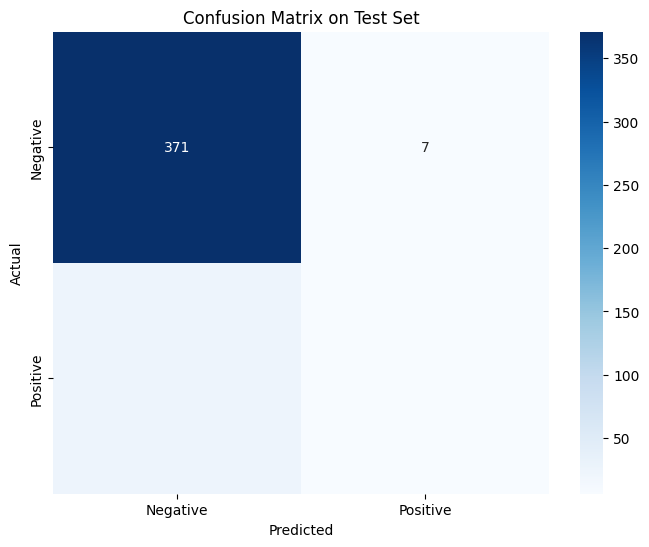

In [171]:
# Load necessary libraries
import numpy as np
import pandas as pd
import json
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from catboost import CatBoostClassifier

# Assuming X_test and y_test are already available from your previous splits
# and scaller has been previously defined and fitted

# Scale the test data using the same scaler
X_test_scaled = scaller.transform(X_test)

# Make predictions
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
test_metrics = {
    'roc_auc': roc_auc_score(y_test, y_pred_proba),
    'f1': f1_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'accuracy': accuracy_score(y_test, y_pred)
}

# Print the test metrics
print("Test Set Evaluation Metrics:")
print(f"ROC AUC: {test_metrics['roc_auc']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")

# Optionally, you can save these metrics to a file
test_evaluation = {
    'test_metrics': test_metrics
}

# Append test metrics to your existing results file
# try:
#     with open('scores_CatBoost_synthetic_edge_cases_arf.json', 'r') as f:
#         existing_data = json.load(f)
    
#     existing_data['test_evaluation'] = test_metrics
    
#     with open('scores_CatBoost_synthetic_edge_cases_arf.json', 'w') as f:
#         json.dump(existing_data, f, indent=4)
    
#     print("Test metrics added to scores_CatBoost_synthetic_edge_cases_arf.json")
# except Exception as e:
#     print(f"Error updating metrics file: {e}")
#     print("Test metrics were not saved to file")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')
plt.show()